<div style="text-align: center;">
  <img src="https://github.com/silvermete0r/oikan/blob/main/docs/media/oikan_logo.png?raw=true" width="120">
</div>

# OIKAN: Neuro-Symbolic ML for Scientific Discovery

OIKAN is a neuro-symbolic machine learning framework inspired by Kolmogorov-Arnold representation theorem. It combines the power of modern neural networks with techniques for extracting clear, interpretable symbolic formulas from data. OIKAN is designed to make machine learning models both accurate and Interpretable.

* GitHub: https://github.com/silvermete0r/oikan
* PyPI: https://pypi.org/project/oikan/

## 👋 Welcome to the OIKAN Get Started Template!

This notebook demonstrates how to use the OIKAN v0.0.3 library for both classification and regression tasks. It includes:
* Classification using the Iris dataset with `OIKANClassifier`.
* Regression using the California Housing dataset with `OIKANRegressor`.
* Extracting symbolic formulas, feature importances, and saving/loading models.

# 1. Setup and Installation

In [1]:
# Install OIKAN v0.0.3 quietly
!pip install -qU oikan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-cu12 25.2.0 which is incompatible.


In [2]:
# (Optional) Verify installation
!pip freeze | grep oikan

oikan==0.0.3.5


In [3]:
# (Optional) Create output directory for saving models
!mkdir -p outputs

# 2. Classification: Iris Dataset

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from oikan import OIKANClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize OIKANClassifier
model = OIKANClassifier(
    hidden_sizes=[32, 32],
    activation='relu',
    augmentation_factor=10,
    alpha=0.1,
    sigma=0.1,
    epochs=100,
    lr=0.001,
    batch_size=32,
    top_k=10,
    evaluate_nn=False,
    verbose=True
)

In [8]:
# Fit the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/oikan/model.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
Training: 100%|██████████| 100/100 [00:01<00:00, 88.25it/s, loss=0.0845]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+02, tolerance: 5.915e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.844e+0

Original data: features shape: (120, 4) | target shape: (120,)
Augmented data: features shape: (1200, 4) | target shape: (1200, 3)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.970e+02, tolerance: 7.014e+00
  model = cd_fast.enet_coordinate_descent(


In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [11]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# Get symbolic formulas for each class
print("\nSymbolic Formulas:")
formulas = model.get_formula()
for i, formula in enumerate(formulas):
    print(f"Class {i} Formula: {formula}")


Symbolic Formulas:
Class 0 Formula: Class 0: 0.502330*x0 + 0.047963*x1 + 0.068156*x0^2 + 0.060449*x0 x1 + -0.348062*x0 x2 + -0.302223*x0 x3 + 0.788278*x1^2 + -0.205325*x1 x2 + -0.123608*x1 x3 + -0.158860*x2^2 + 0.020679*x0^3 + -0.001237*exp_x0 + -0.104283*exp_x1 + 0.000461*x2^3 + 0.006598*exp_x2 + 0.370910*sin_x2 + 0.007158*x3^3
Class 1 Formula: Class 1: 0.095236*x0 + 0.164205*x0^2 + 0.029835*x0 x1 + 0.002185*x0 x2 + 0.101242*x1 x2 + -0.016630*x2^2 + -0.123284*x2 x3 + -0.007198*x0^3 + -0.000386*exp_x0 + -0.003938*exp_x1 + -0.026264*x2^3 + 0.004455*exp_x2 + -0.037553*x3^3
Class 2 Formula: Class 2: -0.713402*x0 + -0.156225*x1 + -0.109722*x0^2 + -0.039182*x0 x1 + 0.293238*x0 x2 + 0.401316*x0 x3 + -0.732060*x1^2 + 0.093550*x1 x2 + 0.104036*x1 x3 + 0.216042*x2^2 + -0.020035*x0^3 + 0.001268*exp_x0 + 0.100670*exp_x1 + 0.014878*x2^3 + -0.008931*exp_x2 + -0.299646*sin_x2


In [13]:
# Get feature importances
print("\nFeature Importances:")
importances = model.feature_importances()
print(importances)


Feature Importances:
[0.34342276 0.29054357 0.24734127 0.1186924 ]


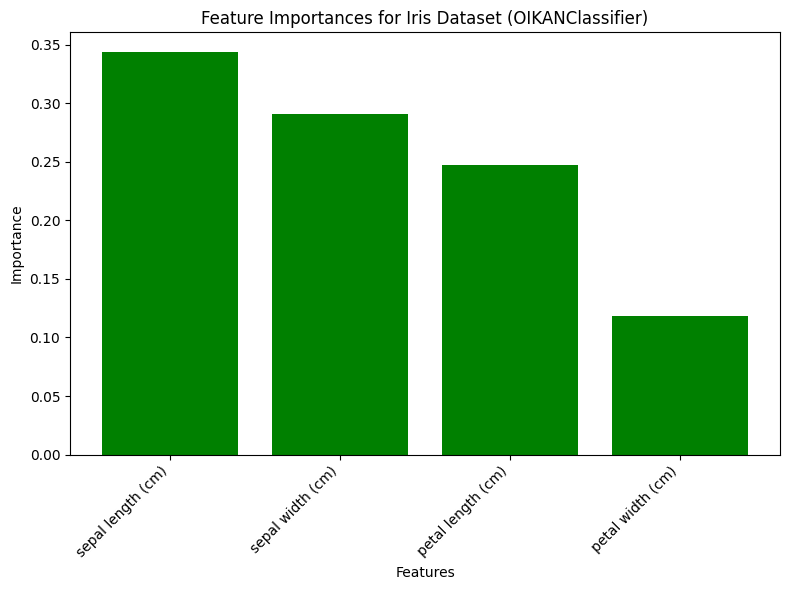

In [14]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Iris Dataset (OIKANClassifier)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Save the model
model.save("outputs/iris_model.json")

Model saved to outputs/iris_model.json


In [16]:
# Load the model
loaded_model = OIKANClassifier()
loaded_model.load("outputs/iris_model.json")

In [17]:
# Original formulas
print("Original Formulas:")
formulas_loaded = loaded_model.get_formula(type='original')
for i, formula in enumerate(formulas_loaded):
    print(f"Class {i}: {formula}")

Original Formulas:
Class 0: Class 0: 0.502330*x0 + 0.047963*x1 + 0.068156*x0^2 + 0.060449*x0 x1 + -0.348062*x0 x2 + -0.302223*x0 x3 + 0.788278*x1^2 + -0.205325*x1 x2 + -0.123608*x1 x3 + -0.158860*x2^2 + 0.020679*x0^3 + -0.001237*exp_x0 + -0.104283*exp_x1 + 0.000461*x2^3 + 0.006598*exp_x2 + 0.370910*sin_x2 + 0.007158*x3^3
Class 1: Class 1: 0.095236*x0 + 0.164205*x0^2 + 0.029835*x0 x1 + 0.002185*x0 x2 + 0.101242*x1 x2 + -0.016630*x2^2 + -0.123284*x2 x3 + -0.007198*x0^3 + -0.000386*exp_x0 + -0.003938*exp_x1 + -0.026264*x2^3 + 0.004455*exp_x2 + -0.037553*x3^3
Class 2: Class 2: -0.713402*x0 + -0.156225*x1 + -0.109722*x0^2 + -0.039182*x0 x1 + 0.293238*x0 x2 + 0.401316*x0 x3 + -0.732060*x1^2 + 0.093550*x1 x2 + 0.104036*x1 x3 + 0.216042*x2^2 + -0.020035*x0^3 + 0.001268*exp_x0 + 0.100670*exp_x1 + 0.014878*x2^3 + -0.008931*exp_x2 + -0.299646*sin_x2


In [18]:
# Simplified formulas
print("\nSimplified Formulas:")
simplified_formulas = loaded_model.get_formula(type='sympy')
for i, formula in enumerate(simplified_formulas):
    print(f"Class {i}: {formula}")


Simplified Formulas:
Class 0: Class 0: 0.04796*x1 + 0.00046*x2**3 + 0.00660*exp(x2) + 0.00716*x3**3 + 0.06816*x0**2 + 0.02068*x0**3 + 0.50233*x0 + 0.37091*sin(x2) + 0.78828*x1**2 - 0.00124*exp(x0) - 0.10428*exp(x1) - 0.15886*x2**2 + 0.06045*x0*x1 - 0.30222*x0*x3 - 0.20533*x1*x2 - 0.34806*x0*x2 - 0.12361*x1*x3
Class 1: Class 1: 0.00445*exp(x2) + 0.16421*x0**2 + 0.09524*x0 - 0.00394*exp(x1) - 0.02626*x2**3 - 0.00720*x0**3 - 0.01663*x2**2 - 0.03755*x3**3 - 0.00039*exp(x0) + 0.00218*x0*x2 + 0.10124*x1*x2 + 0.02983*x0*x1 - 0.12328*x2*x3
Class 2: Class 2: 0.21604*x2**2 + 0.01488*x2**3 + 0.00127*exp(x0) + 0.10067*exp(x1) - 0.29965*sin(x2) - 0.00893*exp(x2) - 0.15623*x1 - 0.02004*x0**3 - 0.71340*x0 - 0.73206*x1**2 - 0.10972*x0**2 + 0.09355*x1*x2 + 0.10404*x1*x3 + 0.29324*x0*x2 + 0.40132*x0*x3 - 0.03918*x0*x1


In [19]:
# LaTeX formulas
print("\nLaTeX Formulas:")
latex_formulas = loaded_model.get_formula(type='latex')
for i, formula in enumerate(latex_formulas):
    print(f"Class {i}: {formula}")


LaTeX Formulas:
Class 0: Class 0: 0.02068 x_{0}^{3} + 0.06816 x_{0}^{2} + 0.06045 x_{0} x_{1} - 0.34806 x_{0} x_{2} - 0.30222 x_{0} x_{3} + 0.50233 x_{0} + 0.78828 x_{1}^{2} - 0.20533 x_{1} x_{2} - 0.12361 x_{1} x_{3} + 0.04796 x_{1} + 0.00046 x_{2}^{3} - 0.15886 x_{2}^{2} + 0.00716 x_{3}^{3} - 0.00124 e^{x_{0}} - 0.10428 e^{x_{1}} + 0.0066 e^{x_{2}} + 0.37091 \sin{\left(x_{2} \right)}
Class 1: Class 1: - 0.0072 x_{0}^{3} + 0.16421 x_{0}^{2} + 0.02983 x_{0} x_{1} + 0.00218 x_{0} x_{2} + 0.09524 x_{0} + 0.10124 x_{1} x_{2} - 0.02626 x_{2}^{3} - 0.01663 x_{2}^{2} - 0.12328 x_{2} x_{3} - 0.03755 x_{3}^{3} - 0.00039 e^{x_{0}} - 0.00394 e^{x_{1}} + 0.00445 e^{x_{2}}
Class 2: Class 2: - 0.02004 x_{0}^{3} - 0.10972 x_{0}^{2} - 0.03918 x_{0} x_{1} + 0.29324 x_{0} x_{2} + 0.40132 x_{0} x_{3} - 0.7134 x_{0} - 0.73206 x_{1}^{2} + 0.09355 x_{1} x_{2} + 0.10404 x_{1} x_{3} - 0.15623 x_{1} + 0.01488 x_{2}^{3} + 0.21604 x_{2}^{2} + 0.00127 e^{x_{0}} + 0.10067 e^{x_{1}} - 0.00893 e^{x_{2}} - 0.29965 

# 3. Regression: California Housing Dataset

In [20]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from oikan import OIKANRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize OIKANRegressor
model = OIKANRegressor(
    hidden_sizes=[32, 32],
    activation='relu',
    augmentation_factor=1,
    alpha=0.1,
    sigma=0.1,
    epochs=100,
    lr=0.001,
    batch_size=32,
    top_k=10,
    evaluate_nn=False,
    verbose=True
)

In [24]:
# Fit the model
model.fit(X_train, y_train)

Training: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s, loss=0.4432]


Original data: features shape: (16512, 8) | target shape: (16512, 1)
Augmented data: features shape: (16512, 8) | target shape: (16512, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+02, tolerance: 6.691e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.657e+02, tolerance: 6.691e+00
  model = cd_fast.enet_coordinate_descent(


In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.8417
R^2 Score: 0.3577


In [27]:
# Get symbolic formula
print("\nSymbolic Formula:")
formula = model.get_formula()
print(formula)


Symbolic Formula:
0.016541*x1 + 0.000361*x4 + -0.005436*x7 + 0.054910*x0^2 + 0.003279*x0 x1 + 0.000008*x0 x4 + 0.004007*x0 x5 + 0.000944*x0 x6 + -0.000631*x0 x7 + -0.000697*x1^2 + -0.001050*x1 x2 + 0.000003*x1 x4 + -0.000379*x1 x5 + -0.000428*x1 x6 + -0.000074*x1 x7 + 0.002858*x2^2 + -0.000023*x2 x4 + -0.003552*x2 x6 + 0.000169*x2 x7 + -0.000010*x3 x4 + 0.009420*x3 x5 + -0.003057*x3 x7 + 0.000011*x4 x5 + -0.000001*x4 x6 + 0.000003*x4 x7 + 0.000157*x5^2 + -0.000159*x5 x6 + 0.001021*x5 x7 + 0.000293*x6^2 + -0.000057*x6 x7 + 0.000018*x7^2 + 0.000030*exp_x5 + 0.049820*sin_x5 + -0.001212*x3^3 + -0.000013*exp_x3 + 0.000011*x1^3 + -0.003295*x0^3 + -0.000007*exp_x0 + -0.000005*x2^3 + 0.000014*exp_x2 + -0.000014*x6^3 + 0.000022*exp_x6 + -0.000017*exp_x4


In [28]:
# Get feature importances
print("\nFeature Importances:")
importances = model.feature_importances()
print(importances)


Feature Importances:
[0.34882481 0.11680076 0.03988492 0.07131129 0.00227446 0.33802762
 0.0284463  0.05442985]


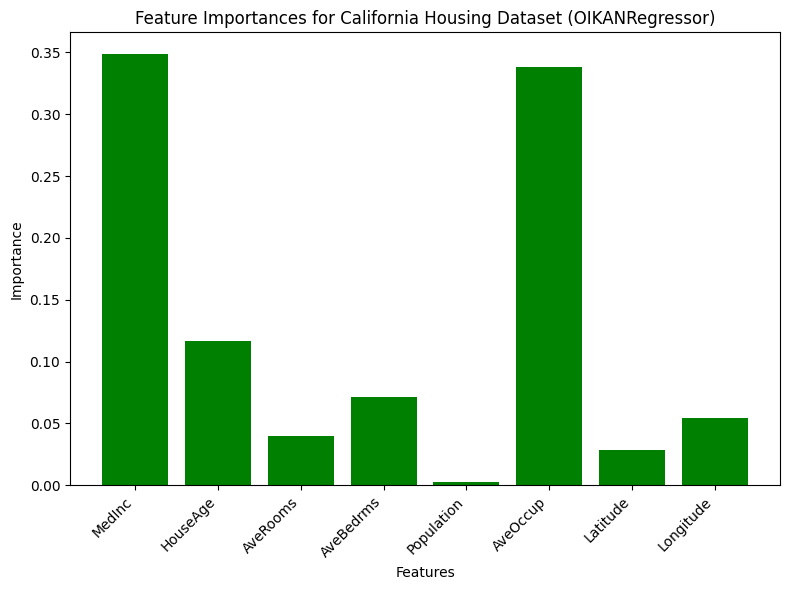

In [29]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for California Housing Dataset (OIKANRegressor)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Save the model
model.save("outputs/california_housing_model.json")

Model saved to outputs/california_housing_model.json


In [31]:
# Load the model
loaded_model = OIKANRegressor()
loaded_model.load("outputs/california_housing_model.json")

In [32]:
# Original formula
print("Original Formula:")
formula_loaded = loaded_model.get_formula(type='original')
print(formula_loaded)

Original Formula:
0.016541*x1 + 0.000361*x4 + -0.005436*x7 + 0.054910*x0^2 + 0.003279*x0 x1 + 0.000008*x0 x4 + 0.004007*x0 x5 + 0.000944*x0 x6 + -0.000631*x0 x7 + -0.000697*x1^2 + -0.001050*x1 x2 + 0.000003*x1 x4 + -0.000379*x1 x5 + -0.000428*x1 x6 + -0.000074*x1 x7 + 0.002858*x2^2 + -0.000023*x2 x4 + -0.003552*x2 x6 + 0.000169*x2 x7 + -0.000010*x3 x4 + 0.009420*x3 x5 + -0.003057*x3 x7 + 0.000011*x4 x5 + -0.000001*x4 x6 + 0.000003*x4 x7 + 0.000157*x5^2 + -0.000159*x5 x6 + 0.001021*x5 x7 + 0.000293*x6^2 + -0.000057*x6 x7 + 0.000018*x7^2 + 0.000030*exp_x5 + 0.049820*sin_x5 + -0.001212*x3^3 + -0.000013*exp_x3 + 0.000011*x1^3 + -0.003295*x0^3 + -0.000007*exp_x0 + -0.000005*x2^3 + 0.000014*exp_x2 + -0.000014*x6^3 + 0.000022*exp_x6 + -0.000017*exp_x4


In [33]:
# Simplified formula
print("\nSimplified Formula:")
simplified_formula = loaded_model.get_formula(type='sympy')
print(simplified_formula)


Simplified Formula:
0.00029*x6**2 + 0.04982*sin(x5) + 0.00286*x2**2 + 0.05491*x0**2 + 0.01654*x1 + 0.00016*x5**2 + 0.00036*x4 - 0.00070*x1**2 - 0.00544*x7 - 0.00330*x0**3 - 0.00121*x3**3 + 0.00102*x5*x7 + 0.00017*x2*x7 + 0.00094*x0*x6 + 0.00401*x0*x5 + 0.00942*x3*x5 + 0.00328*x0*x1 - 0.00006*x6*x7 - 0.00016*x5*x6 - 0.00355*x2*x6 - 0.00105*x1*x2 - 0.00007*x1*x7 - 0.00063*x0*x7 - 0.00038*x1*x5 - 0.00306*x3*x7 - 0.00043*x1*x6


In [34]:
# LaTeX formula
print("\nLaTeX Formula:")
latex_formula = loaded_model.get_formula(type='latex')
print(latex_formula)


LaTeX Formula:
- 0.0033 x_{0}^{3} + 0.05491 x_{0}^{2} + 0.00328 x_{0} x_{1} + 0.00401 x_{0} x_{5} + 0.00094 x_{0} x_{6} - 0.00063 x_{0} x_{7} - 0.0007 x_{1}^{2} - 0.00105 x_{1} x_{2} - 0.00038 x_{1} x_{5} - 0.00043 x_{1} x_{6} - 7.0 \cdot 10^{-5} x_{1} x_{7} + 0.01654 x_{1} + 0.00286 x_{2}^{2} - 0.00355 x_{2} x_{6} + 0.00017 x_{2} x_{7} - 0.00121 x_{3}^{3} + 0.00942 x_{3} x_{5} - 0.00306 x_{3} x_{7} + 0.00036 x_{4} + 0.00016 x_{5}^{2} - 0.00016 x_{5} x_{6} + 0.00102 x_{5} x_{7} + 0.00029 x_{6}^{2} - 6.0 \cdot 10^{-5} x_{6} x_{7} - 0.00544 x_{7} + 0.04982 \sin{\left(x_{5} \right)}


### Potential Improvements:

* Add data preprocessing & feature engineering steps;
* Make visualizations using `matplotlib` / `seaborn`;
* Experiment with different hyperparameter values for better performance.


🙌 Thank you for using `OIKAN`! 